<a href="https://colab.research.google.com/github/shreshyy/Score-Prediction-on-the-basis-of-hours-studied-/blob/main/student_marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SCORE PREDICTION ON THE BASIS OF HOURS STUDIED USING SUPERVISED MACHINE LEARNING**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Visualisation

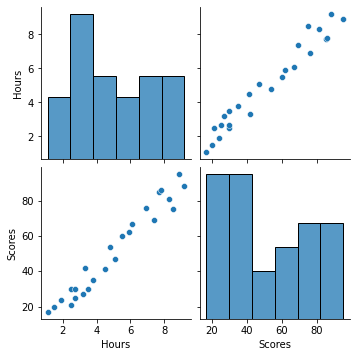

In [ ]:
sns.pairplot(df)

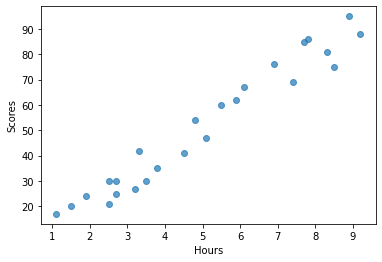

In [ ]:
x = df['Hours']
y = df['Scores']
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,alpha=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


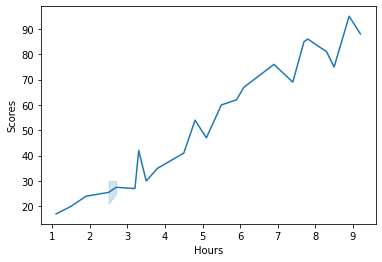

In [ ]:
sns.lineplot(x,y,data=df)

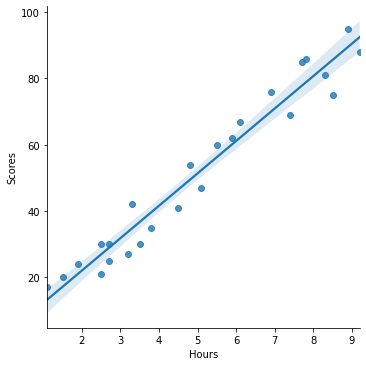

In [ ]:
sns.lmplot(x='Hours',y='Scores',data=df)

In [ ]:
X = df['Scores']
y = df['Hours']

In [ ]:
x = np.array(df["Hours"]).reshape(-1,1)
y = np.array(df["Scores"])

Training Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(fit_intercept=True)
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Linear Model Coefficient (m)',regression.coef_)
print('Linear Model Coefficient (b)',regression.intercept_)

Linear Model Coefficient (m) [9.68207815]
Linear Model Coefficient (b) 2.826892353899737


Testing Model

In [ ]:
y_predict = regression.predict(x_test)
y_predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [ ]:
y_test

array([81, 30, 21, 76, 62])

In [ ]:
y_predict=regression.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
print(df)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


Visualising Prediction

Text(0.5, 1.0, 'Test Set')

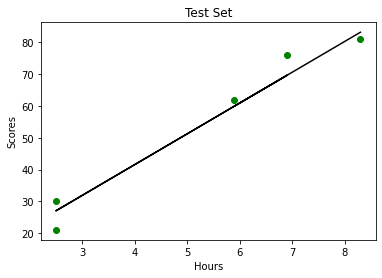

In [ ]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,regression.predict(x_test),color='black')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title('Test Set')

Best Fit

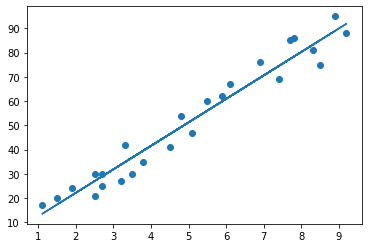

In [ ]:
linefit=regression.coef_*x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,linefit)
plt.show()

Prediction of Scores obtained if studied for 9.25 hours

In [ ]:
hour = [[9.25]]
a = regression.predict(hour)
print("The marks scored is",a)

The marks scored is [92.38611528]


Accuracy measure

In [ ]:
accuracy=regression.score(x_test,y_test)
print("The accuracy of applied model is",accuracy*100)

The accuracy of applied model is 96.78055545167994


Error Detection

In [ ]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean absolute error: 3.9207511902099244
Mean squared error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


By Shreshtha Chourasia